In [65]:
import sys
import pymzml
import matplotlib.pyplot as plt
import os
import glob


def get_mzml_files_in_subfolders(folder_path):
    mzml_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".mzML"):
                mzml_files.append(os.path.join(root, file))
    return mzml_files

In [68]:
mzml_file = "//mms2.farmbio.uu.se/imaging3/NewProjects2023/Metabolite_Identification/202306_FMP10_MSMS_standards/Dopamine/230628_mz421_19_1A_1mz_scans_1_40eV_0_6tof_0_N14_000001.mzML"


folder_path = '//mms2.farmbio.uu.se/imaging3/NewProjects2023/Metabolite_Identification/202306_FMP10_MSMS_standards'
mzml_files = get_mzml_files_in_subfolders(folder_path)

print(f"Found {len(mzml_files)} .mzML files:")

Found 794 .mzML files:


In [110]:
name = mzml_file.split("/")[-2]
filename = mzml_file.split("/")[-1].split(".")[0]
adduct = filename.split("_")[3]
window = filename.split("_")[4]
ev = filename.split("_")[7]
tof = float(".".join(filename.split("_")[8:10]).strip("tof"))
mz = float(".".join(filename.split("_")[1:3]).strip("mz"))
filename.split("_")


['230628',
 'mz421',
 '19',
 '1A',
 '1mz',
 'scans',
 '1',
 '40eV',
 '0',
 '6tof',
 '0',
 'N14',
 '000001']

In [111]:
adduct, ev, tof, mz, window

('1A', '40eV', 0.6, 421.19, '1mz')

In [84]:
run = pymzml.run.Reader(mzml_file)
for n, spec in enumerate(run):
    print(
        "Spectrum {0}, MS level {ms_level} @ RT {scan_time:1.2f}".format(
            spec.ID, ms_level=spec.ms_level, scan_time=spec.scan_time_in_minutes()
        )
    )

    print(spec.mz)
    print(len(spec.mz))
    print(spec.i)
    spec2 = spec
    #spec.remove_noise(noise_level=0.1)
    print(len(spec2.peaks("centroided")))
    print(len(spec2.peaks("raw")))
    print(len(spec.peaks("raw")))
    print(len(spec2.peaks("reprofiled")))

    peaks = spec2.peaks("centroided")
    peaks2 = spec2.peaks("raw")
    peaks3 = spec2.peaks("reprofiled")
    print("Parsed {0} spectra from file {1}".format(n, mzml_file))
print()

Spectrum 1, MS level 2 @ RT 0.05
[107.50213201 107.50215764 107.50218327 ... 449.99853089 449.99897999
 449.99942909]
3192346
[0. 0. 0. ... 0. 0. 0.]
15920
3192346
3192346
40423
Parsed 0 spectra from file //mms2.farmbio.uu.se/imaging3/NewProjects2023/Metabolite_Identification/202306_FMP10_MSMS_standards/Dopamine/230628_mz421_19_1A_1mz_scans_1_40eV_0_6tof_0_N14_000001.mzML



In [85]:
s = spec.removeNoise().peaks("centroided")

print(len(s))
s

2730


array([[1.07648666e+02, 1.85885276e+05],
       [1.07758971e+02, 8.27399562e+05],
       [1.08038628e+02, 1.60085469e+06],
       ...,
       [4.47224310e+02, 1.17971542e+05],
       [4.48110952e+02, 8.27764460e+04],
       [4.48945927e+02, 8.43717025e+04]])

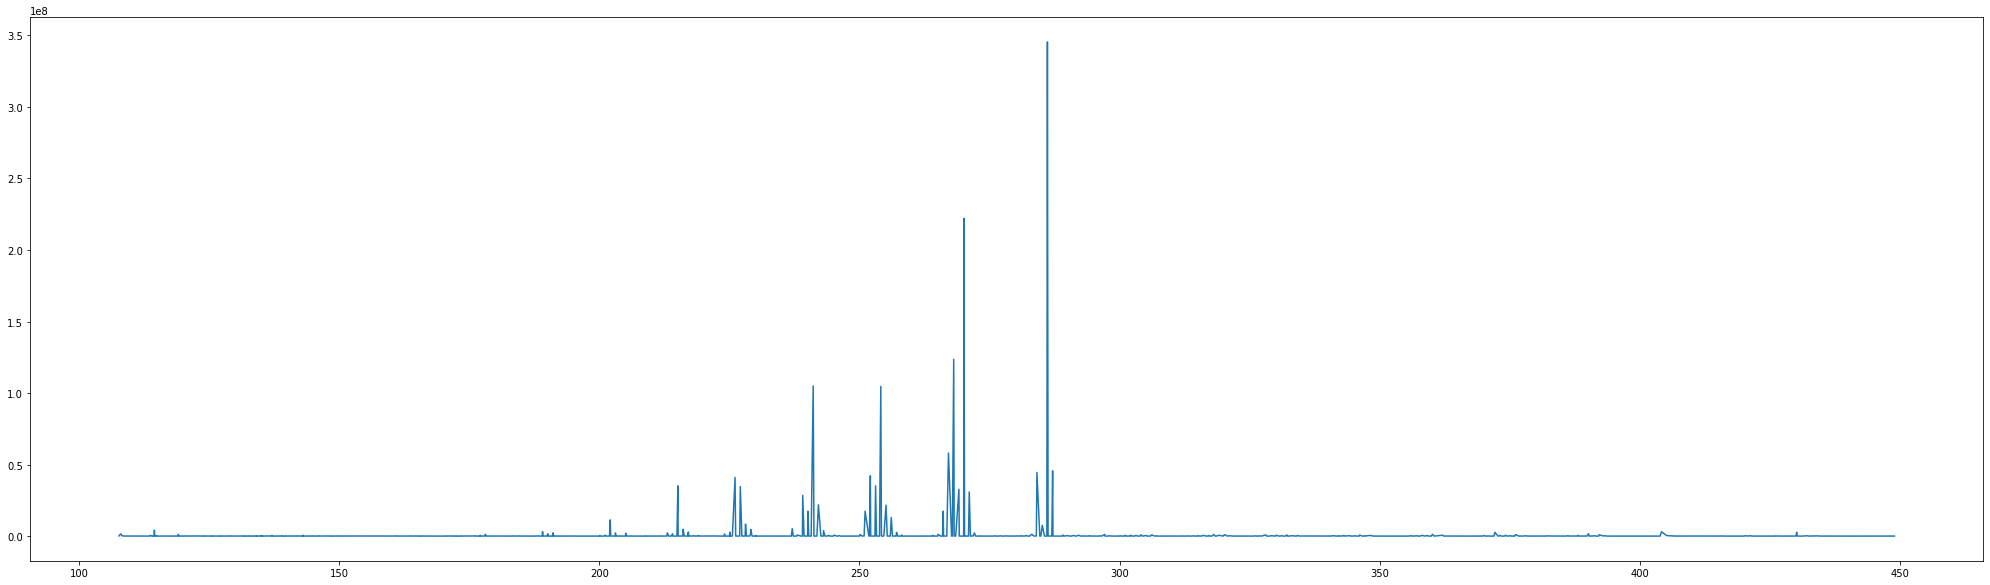

2730


In [86]:
x = [sub_array[0] for sub_array in s]
y = [sub_array[1] for sub_array in s]

plt.figure(figsize=(35, 10))
plt.plot(x, y)
plt.show()
print(len(x))

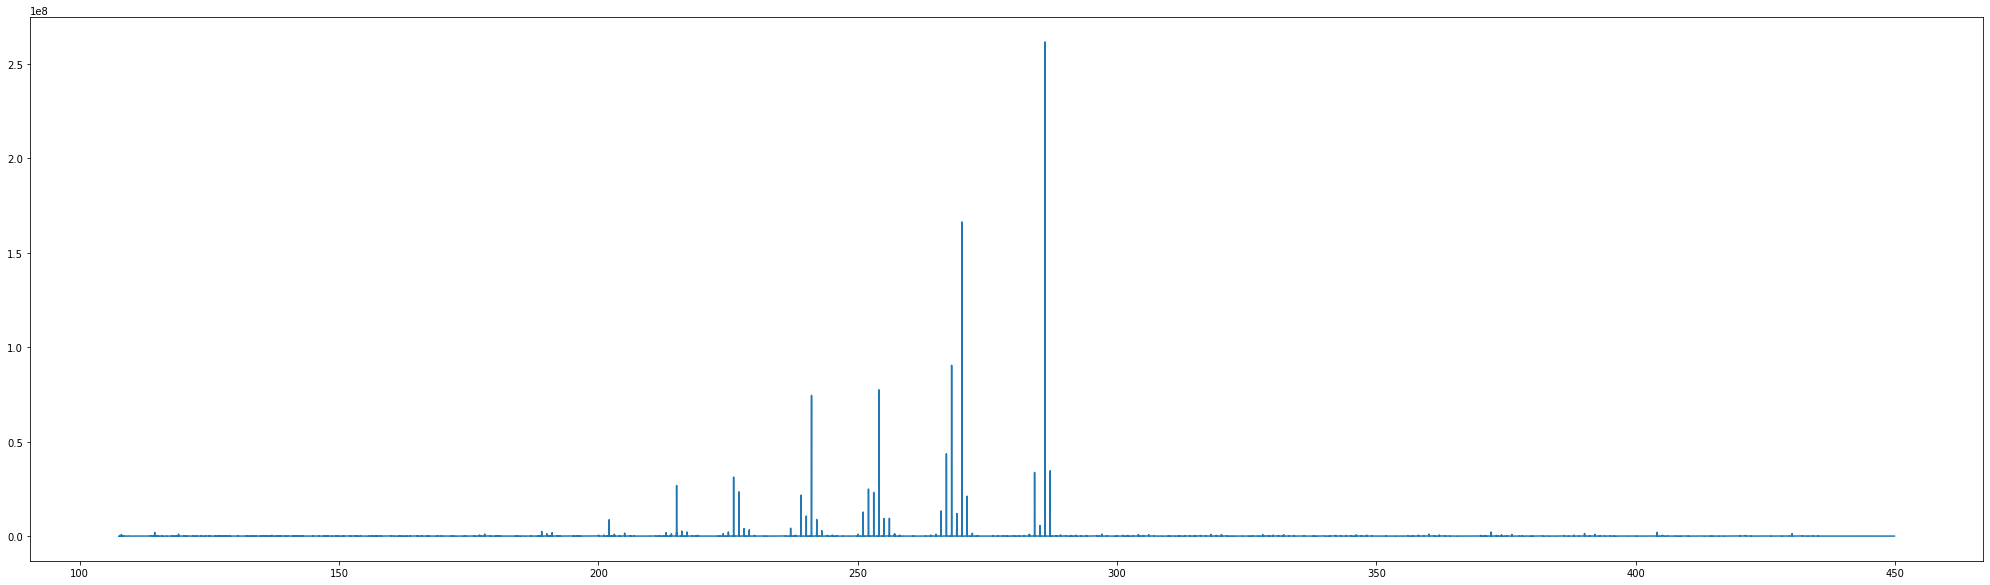

In [35]:
x = [sub_array[0] for sub_array in peaks2]
y = [sub_array[1] for sub_array in peaks2]

plt.figure(figsize=(35, 10))
plt.plot(x, y)
plt.show()

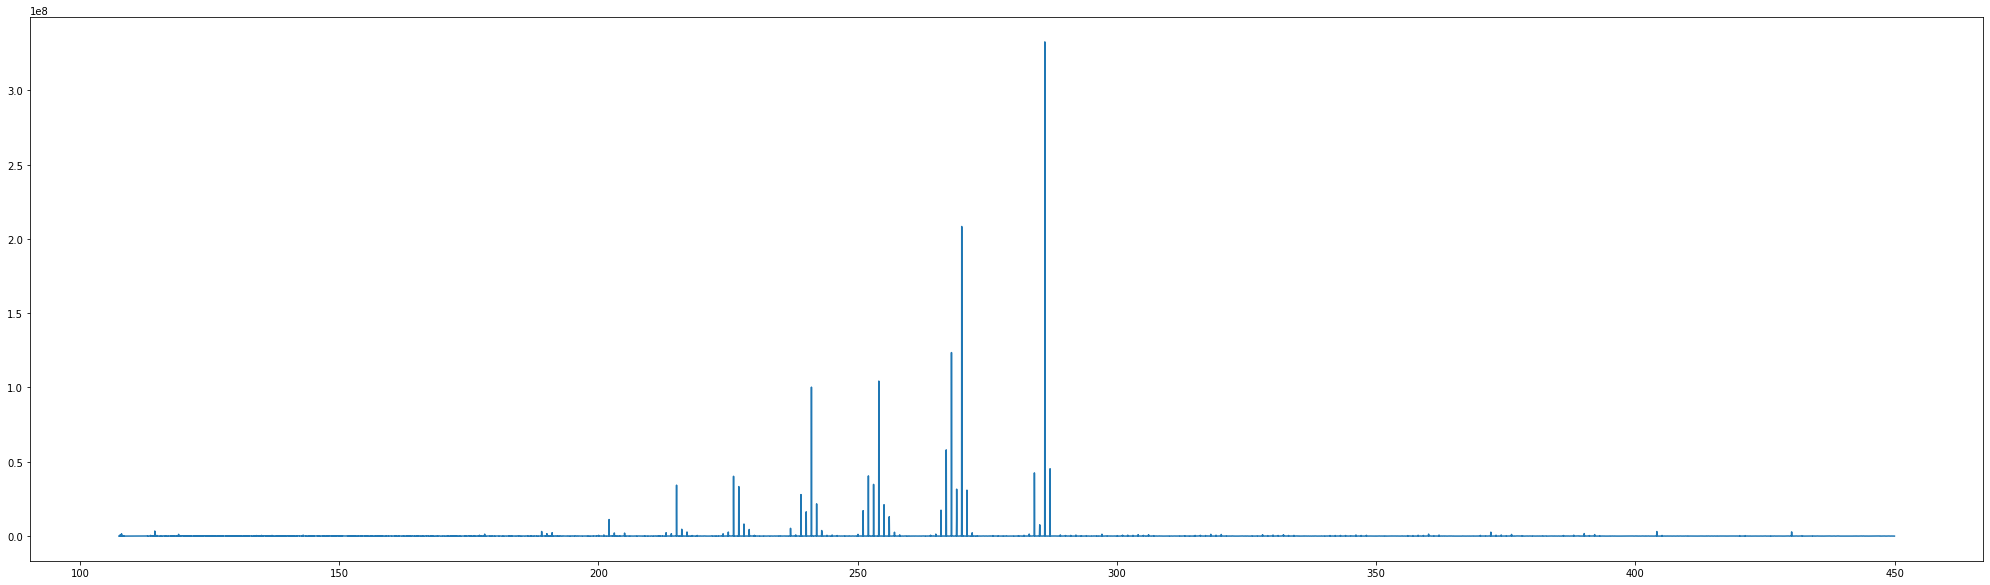

In [36]:
x = [sub_array[0] for sub_array in peaks3]
y = [sub_array[1] for sub_array in peaks3]

plt.figure(figsize=(35, 10))
plt.plot(x, y)
plt.show()